In [3]:
import pandas as pd
df = pd.read_csv('dataset_lemon.csv')
df

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
0,57.1,105,3.7,8.4,California,Puncak,Kuning cerah,Grade A
1,60.2,118,3.8,8.2,Malang,Puncak,Kuning cerah,Grade A
2,48.5,80,4.6,7.8,Medan,Akhir,Kuning kehijauan,Grade B
3,65.8,136,5.1,7.0,California,Akhir,Hijau pekat,Reject
4,55.9,101,3.5,8.5,Malang,Awal,Kuning cerah,Grade A
...,...,...,...,...,...,...,...,...
790,54.9,98,4.2,7.7,Medan,Akhir,Kuning kehijauan,Grade B
791,67.2,141,5.7,6.8,California,Akhir,Hijau pekat,Reject
792,57.0,105,3.5,8.4,Malang,Awal,Kuning cerah,Grade A
793,51.1,89,4.5,7.9,Medan,Puncak,Kuning kehijauan,Grade B


In [4]:
df.info()
df.describe()
df.dtypes
df['asal_daerah'].value_counts()
df['asal_daerah'].value_counts()
df['asal_daerah'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diameter     795 non-null    float64
 1   berat        795 non-null    int64  
 2   tebal_kulit  795 non-null    float64
 3   kadar_gula   795 non-null    float64
 4   asal_daerah  795 non-null    object 
 5   musim_panen  795 non-null    object 
 6   warna        795 non-null    object 
 7   kualitas     795 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 49.8+ KB


asal_daerah
California    265
Malang        265
Medan         265
Name: count, dtype: int64

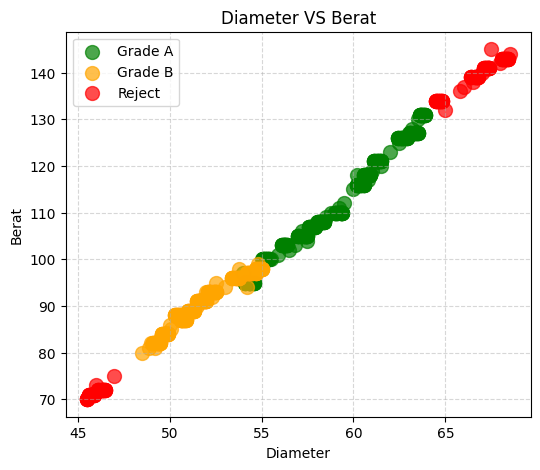

In [5]:
import matplotlib.pyplot as plt

grade_a = df[df['kualitas']=='Grade A']
grade_b = df[df['kualitas']=='Grade B']
reject = df[df['kualitas']=='Reject']

plt.figure(figsize= (6,5))
plt.scatter(grade_a['diameter'], grade_a['berat'], s=100, alpha=0.7,color='green', label='Grade A')
plt.scatter(grade_b['diameter'], grade_b['berat'], s=100, alpha=0.7,color='orange', label='Grade B')
plt.scatter(reject['diameter'], reject['berat'], s=100, alpha=0.7,color='red', label='Reject')
plt.xlabel('Diameter')
plt.ylabel('Berat')
plt.title('Diameter VS Berat')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

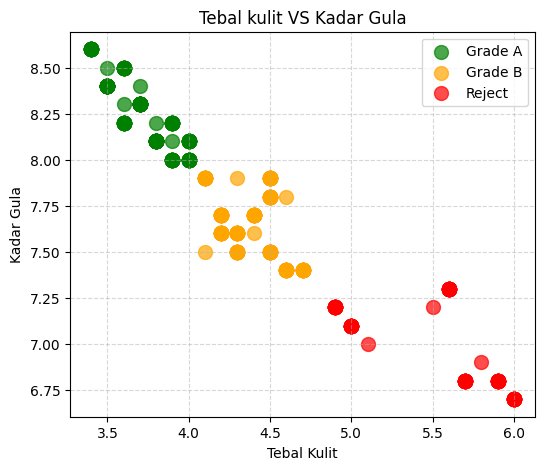

In [6]:
import matplotlib.pyplot as plt

grade_a = df[df['kualitas']=='Grade A']
grade_b = df[df['kualitas']=='Grade B']
reject = df[df['kualitas']=='Reject']

plt.figure(figsize= (6,5))
plt.scatter(grade_a['tebal_kulit'], grade_a['kadar_gula'], s=100, alpha=0.7,color='green', label='Grade A')
plt.scatter(grade_b['tebal_kulit'], grade_b['kadar_gula'], s=100, alpha=0.7,color='orange', label='Grade B')
plt.scatter(reject['tebal_kulit'], reject['kadar_gula'], s=100, alpha=0.7,color='red', label='Reject')
plt.xlabel('Tebal Kulit')
plt.ylabel('Kadar Gula')
plt.title('Tebal kulit VS Kadar Gula')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[['diameter', 'berat', 'tebal_kulit', 'kadar_gula', 'asal_daerah', 'musim_panen', 'warna']]
y = df['kualitas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

numeric_column = ['diameter', 'berat', 'tebal_kulit', 'kadar_gula']
categorical_column = ['asal_daerah', 'musim_panen']
ordinal_column = ['warna']
warna_order = ['Hijau pekat', 'Kuning kehijauan', 'Kuning cerah']
ordinal_order = [warna_order]

preprocessing = ColumnTransformer (
    transformers = [
        ('scaler', StandardScaler(), numeric_column),
        ('ohe', OneHotEncoder(), categorical_column),
        ('oe', OrdinalEncoder(categories=ordinal_order), ordinal_column)
    ]
)

model = Pipeline (
    steps = [
        ('preprocessing', preprocessing),
        ('model', LogisticRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Akurasi model : ', accuracy_score(y_test, y_pred))
print('Klasifikasi report model : ', classification_report(y_test, y_pred))
print('Confusion matrix model : ', confusion_matrix(y_test, y_pred))


Akurasi model :  1.0
Klasifikasi report model :                precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00        71
     Grade B       1.00      1.00      1.00        53
      Reject       1.00      1.00      1.00        35

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

Confusion matrix model :  [[71  0  0]
 [ 0 53  0]
 [ 0  0 35]]


In [8]:
import joblib

joblib.dump(model, 'klasifikasi_lemon.joblib')

['klasifikasi_lemon.joblib']

In [10]:
import joblib 
model_tersimpan = joblib.load('klasifikasi_lemon.joblib')

data_baru = pd.DataFrame([[57.2, 94, 3.5, 7.2, 'Malang', 'Awal', 'Kuning kehijauan']], 
                         columns=['diameter', 'berat', 'tebal_kulit', 'kadar_gula', 'asal_daerah', 'musim_panen', 'warna'])
prediksi = model_tersimpan.predict(data_baru)[0]
akurasi = max(model_tersimpan.predict_proba(data_baru)[0])

print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {akurasi*100:.2f}")

Model memprediksi Grade B dengan tingkat keyakinan 87.81
